In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

In [2]:
num_images = 1
img_dim = 16 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 2.5
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 8 
total flux
 498780.71875 
loc
 [[ 2.6367798 15.8408   ]
 [ 6.296625  15.171221 ]
 [ 3.5580199 10.683717 ]
 [ 5.7247696  1.2470021]
 [ 3.5942476  6.239829 ]
 [12.473097   3.5370576]
 [12.014536   2.0466807]
 [ 8.660949   4.3084807]
 [ 0.         0.       ]
 [ 0.         0.       ]] 




True count: 8
True total flux: 498780.71875

Starting the sampler...
iteration 5, temperature = 0.0008670776151120663, posterior mean count = 7.480551719665527
iteration 10, temperature = 0.0035973754711449146, posterior mean count = 7.614020824432373
iteration 15, temperature = 0.008877700194716454, posterior mean count = 7.738487243652344
iteration 20, temperature = 0.017179517075419426, posterior mean count = 7.760730743408203
iteration 25, temperature = 0.029198018833994865, posterior mean count = 7.759161472320557
iteration 30, temperature = 0.04797958582639694, posterior mean count = 7.786734104156494
iteration 35, temperature = 0.07889237999916077, posterior mean count = 7.848095893859863
iteration 40, temperature = 0.13141147792339325, posterior mean count = 7.902289867401123
iteration 45, temperature = 0.20748741924762726, posterior mean count = 7.9552154541015625
iteration 50, temperature = 0.3141939342021942, posterior mean count = 7.9858503341674805
iteration 55, temperatur

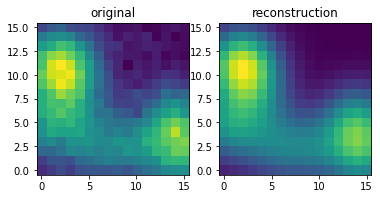

In [4]:
max_objects_smc = max_objects + 2
pad = 0
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, prior,
                 num_blocks = max_objects_smc + 1, catalogs_per_block = 500,
                 max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()